# Sales Prediction

In [2]:
#importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.shape

(200, 4)

In [5]:
#checking missing values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


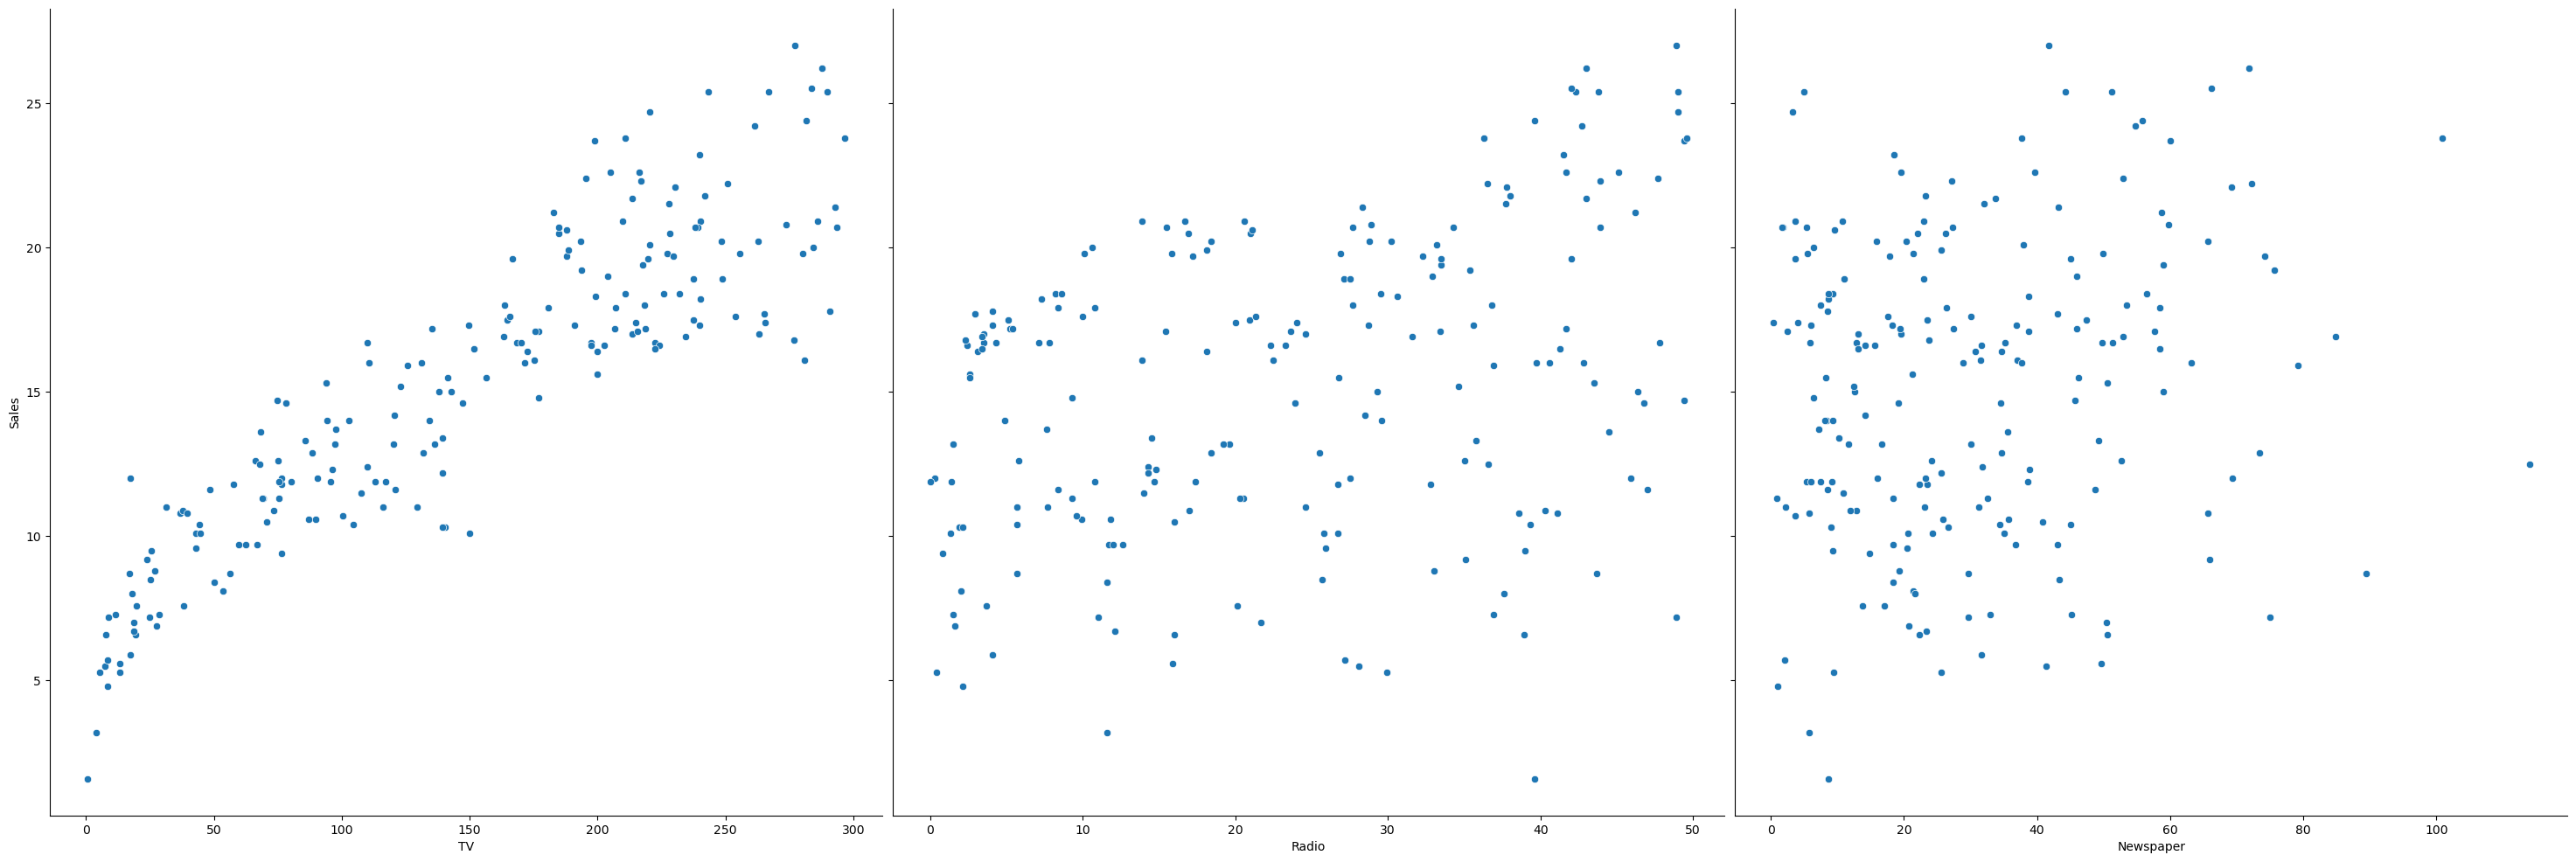

In [8]:
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=10,aspect=1)
plt.show()

In [9]:
X = data[['TV','Radio','Newspaper']]
y = data['Sales']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [12]:
#Create a list of models
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor()
]

In [13]:
#Create list to store the model names,training RMSE,training R-squared,testing RMSE,testing R-squared
model_names = []
train_rmse_score = []
train_r2_score = []
test_rmse_score = []
test_r2_score = []

In [14]:
#Loop through each model
for model in models:
    model_names.append(model.__class__.__name__)#get the name of model
    #train the model
    model.fit(X_train,y_train)
    
    #make prediction on the training and testing data
    y_train_pred=model.predict(X_train)
    y_test_pred =model.predict(X_test)
    
    #Calculate the RMSE and R-squared scores for trainig and testing data
    train_rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
    train_r2 = r2_score(y_train,y_train_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
    test_r2 = r2_score(y_test,y_test_pred)

    #Append the scores to the respective lists
    train_rmse_score.append(train_rmse)
    train_r2_score.append(train_r2)
    test_rmse_score.append(test_rmse)
    test_r2_score.append(test_r2)


In [15]:
#Create a Dataframe to display the model evaluation results
evaluation_results = pd.DataFrame({
    'Model':model_names,
    'Train RMSE':train_rmse_score,
    'Train R-Squared':train_r2_score,
    'Test RMSE':test_rmse_score,
    'Test R-Squared':test_r2_score
})
print(evaluation_results)

                   Model  Train RMSE  Train R-Squared  Test RMSE  \
0       LinearRegression    1.635892         0.900142   1.705215   
1  DecisionTreeRegressor    0.000000         1.000000   1.839769   
2  RandomForestRegressor    0.475014         0.991580   1.199540   

   Test R-Squared  
0        0.905901  
1        0.890465  
2        0.953435  


In [16]:
# Predicting sales for new advertising inputs
new_data = pd.DataFrame({'TV': [150], 'Radio': [20], 'Newspaper': [30]})
predicted_sales = model.predict(new_data)
print("Predicted sales:", predicted_sales)

Predicted sales: [14.737]
